Cхема БД: https://docs.google.com/document/d/1nxz_op8pSg_3uiiviXWROovy83gTPihPTQsMTwfrq30/edit?usp=sharing

Для исполнения кода сделайте локальную копию у себя на диске. (Файл -> Сделать копию на Диске)

# **Все ок, если такой же вывод**


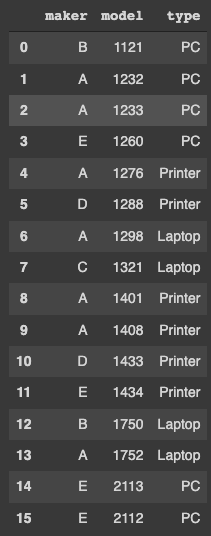

**Задание: Вычислить среднюю цену ПК & принтеров & пк-блокнотов, которые производят компании A или D (на английском). Вывести: одна средняя цена.**

In [1]:
# импортируем библиотеки
import sqlite3
import pandas as pd
import string
conn_sqlite = sqlite3.connect('TestDB.db')
c = conn_sqlite.cursor()

In [2]:
#Создание локальной БД
request = """
drop table if exists Laptop;
drop table if exists PC;
drop table if exists Printer;
drop table if exists Product;

CREATE TABLE Laptop (
	code int NOT NULL ,
	model varchar (50) NOT NULL ,
	speed smallint NOT NULL ,
	ram smallint NOT NULL ,
	hd real NOT NULL ,
	price decimal(12,2) NULL ,
	screen smallint NOT NULL
)
;

CREATE TABLE PC (
	code int NOT NULL ,
	model varchar (50) NOT NULL ,
	speed smallint NOT NULL ,
	ram smallint NOT NULL ,
	hd real NOT NULL ,
	cd varchar (10) NOT NULL ,
	price decimal(12,2) NULL
)
;

CREATE TABLE Product (
	maker varchar (10) NOT NULL ,
	model varchar (50) NOT NULL ,
	type varchar (50) NOT NULL
)
;

CREATE TABLE Printer (
	code int NOT NULL ,
	model varchar (50) NOT NULL ,
	color char (1) NOT NULL ,
	type varchar (10) NOT NULL ,
	price decimal(12,2) NULL
)
;
----Product------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
insert into Product values('B','1121','PC');
insert into Product values('A','1232','PC');
insert into Product values('A','1233','PC');
insert into Product values('E','1260','PC');
insert into Product values('A','1276','Printer');
insert into Product values('D','1288','Printer');
insert into Product values('A','1298','Laptop');
insert into Product values('C','1321','Laptop');
insert into Product values('A','1401','Printer');
insert into Product values('A','1408','Printer');
insert into Product values('D','1433','Printer');
insert into Product values('E','1434','Printer');
insert into Product values('B','1750','Laptop');
insert into Product values('A','1752','Laptop');
insert into Product values('E','2113','PC');
insert into Product values('E','2112','PC');

----PC------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
insert into PC values(1,'1232',500,64,5,'12x','600');
insert into PC values(2,'1121',750,128,14,'40x','850');
insert into PC values(3,'1233',500,64,5,'12x','600');
insert into PC values(4,'1121',620,128,14,'40x','850');
insert into PC values(5,'1121',600,128,8,'40x','850');
insert into PC values(6,'1233',710,128,20,'50x','950');
insert into PC values(7,'1232',500,32,10,'12x','400');
insert into PC values(8,'1232',450,64,8,'24x','350');
insert into PC values(9,'1232',400,32,10,'24x','350');
insert into PC values(10,'1260',500,32,10,'12x','350');
insert into PC values(11,'1233',900,128,40,'40x','980');
insert into PC values(12,'1233',800,128,20,'50x','970');


----Laptop------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
insert into Laptop values(1,'1298',350,32,4,'700',11);
insert into Laptop values(2,'1321',520,64,8,'970',12);
insert into Laptop values(3,'1750',750,128,12,'1200',14);
insert into Laptop values(4,'1298',600,64,10,'1050',15);
insert into Laptop values(5,'1752',750,128,10,'1150',14);
insert into Laptop values(6,'1298',450,64,10,'950',12);


----Printer------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
insert into Printer values(1,'1276','n','Laser','400');
insert into Printer values(2,'1433','y','Jet','270');
insert into Printer values(3,'1434','y','Jet','290');
insert into Printer values(4,'1401','n','Matrix','150');
insert into Printer values(5,'1408','n','Matrix','270');
insert into Printer values(6,'1288','n','Laser','400');

"""

c.executescript(request)
df = pd.read_sql('select * from product', conn_sqlite)


In [3]:
# проверим, сходится ли вывод
df

,maker,model,type
0,B,1121,PC
1,A,1232,PC
2,A,1233,PC
3,E,1260,PC
4,A,1276,Printer
5,D,1288,Printer
6,A,1298,Laptop
7,C,1321,Laptop
8,A,1401,Printer
9,A,1408,Printer


In [9]:
# напишем запрос к бд, используя CTE и джоины для фильтрации
# в CTE выведем цены для каждой категории с нужными производителями
# и обьединим в одну таблицу, а в итоговом запросе найдем округленную среднюю цену

request_task = """
WITH pc_price AS (SELECT p.model,
                         p.maker,
                         pc.price
                  FROM Product as p
                  JOIN PC as pc ON p.model = pc.model
                  WHERE (maker = 'A')
                     OR (maker = 'D')),

    printer_price AS (SELECT p.model,
                             p.maker,
                             pr.price
                      FROM Product as p
                      JOIN Printer as pr ON p.model = pr.model
                      WHERE (maker = 'A')
                         OR (maker = 'D')),
                         
    laptop_price AS (SELECT p.model,
                             p.maker,
                             lp.price
                      FROM Product as p
                      JOIN Laptop as lp ON p.model = lp.model
                      WHERE (maker = 'A')
                         OR (maker = 'D')),

      chosen_gear AS (SELECT * FROM pc_price
                      UNION
                      SELECT * FROM printer_price
                      UNION
                      SELECT * FROM laptop_price)

SELECT ROUND(AVG(price), 1)
FROM chosen_gear
"""

c.execute(request_task)
results = c.fetchall()
display(results)

[(636.9,)]

In [10]:
# Так как результат вывелся в кортеже, мы уберем лишние символы и переведем результат в дробное значение
avg_price = results[0]

avg_price = str(avg_price)

avg_price = avg_price.translate({ord(i): None for i in ')(,'})

avg_price = float(avg_price)

In [11]:
# выводим итоговый результат
print(f'- Средняя цена: {avg_price} ден.ед.')

- Средняя цена: 636.9 ден.ед.
